# 1. Data Preprocess

In [2]:
import pandas as pd
from IPython.core.pylabtools import figsize

store_sales = pd.read_csv(
    'data/train.csv',
    usecols=['store_nbr', 'family', 'date', 'sales', 'onpromotion'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
        'onpromotion': 'uint32',
    },
    parse_dates=['date'],
)
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()

In [3]:
test_sales = pd.read_csv(
    'data/test.csv',
    usecols=['store_nbr', 'family', 'date', 'onpromotion'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'onpromotion': 'uint32',
    },
    parse_dates=['date'],
)
test_sales['date'] = test_sales.date.dt.to_period('D')
test_sales = test_sales.set_index(['store_nbr', 'family', 'date']).sort_index()

In [4]:
holidays_events = pd.read_csv(
    'data/holidays_events.csv',
    dtype={
        'type': 'category',
        'locale': 'category',
        'locale_name': 'category',
        'description': 'category',
        'transferred': 'bool',
    },
    parse_dates=['date'],
)
holidays_events = holidays_events.set_index('date').to_period('D')

# 2. Feature Engineering

## Lag

In [5]:
def make_shifts(ts, begin, end):
    return pd.concat(
        {
            f'y_shift_{i}': ts.shift(i)
            for i in range(begin, end+1)
        },
        axis=1,
    )

y = store_sales.loc[:, 'sales'].unstack(['store_nbr', 'family'])
X_lag = make_shifts(y, 1, 1).dropna().loc['2017':]
y = y.loc['2017':]
display(X_lag)

y_shift_1                                                \
store_nbr           1                                                 
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2017-01-01        2.0       0.0    3.0    2318.0   1.0   334.964996   
2017-01-02        0.0       0.0    0.0       0.0   0.0     0.000000   
2017-01-03        5.0       0.0    0.0    1434.0   0.0   166.819000   
2017-01-04        4.0       0.0    4.0    3081.0   2.0   519.348022   
2017-01-05        1.0       0.0    4.0    3039.0   2.0   543.250977   
...               ...       ...    ...       ...   ...          ...   
2017-08-11        9.0       0.0   10.0    2377.0   0.0   417.020996   
2017-08-12        1.0       0.0    1.0    1006.0   0.0   145.606995   
2017-08-13        6.0       0.0    3.0    1659.0   0.0   243.220001   
2017-08-14        1.0       0.0    1.0     803.0   0.0   136.679001   
2017-08-15        1.0       0.0    6.0    2201.0   0.0   346.037994   

                                                     ...            \
store_nbr                                            ...         9   
family     CELEBRATION CLEANING   DAIRY        DELI  ... MAGAZINES   
date                                                 ...             
2017-01-01        10.0    518.0   631.0  133.266998  ...       3.0   
2017-01-02         0.0      0.0     0.0    0.000000  ...       0.0   
2017-01-03         0.0    332.0   376.0   44.980000  ...       5.0   
2017-01-04        15.0    952.0  1045.0  209.300003  ...       2.0   
2017-01-05        17.0   1055.0  1029.0  135.944000  ...       3.0   
...                ...      ...     ...         ...  ...       ...   
2017-08-11        17.0    696.0   736.0  139.761002  ...       3.0   
2017-08-12         4.0    341.0   343.0   64.302002  ...       5.0   
2017-08-13         3.0    351.0   526.0   99.487999  ...       2.0   
2017-08-14         1.0    169.0   266.0   47.770000  ...       3.0   
2017-08-15         4.0    571.0   699.0  154.578003  ...      12.0   

                                                                           \
store_nbr                                                                   
family           MEATS PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS   
date                                                                        
2017-01-01  278.092010         516.0         18.0                     4.0   
2017-01-02    0.000000           0.0          0.0                     0.0   
2017-01-03  659.570007        1243.0         11.0                    41.0   
2017-01-04  547.364014         876.0          6.0                    15.0   
2017-01-05  395.287994         677.0          6.0                    13.0   
...                ...           ...          ...                     ...   
2017-08-11  484.434021         329.0         11.0                     4.0   
2017-08-12  309.244995         373.0         11.0                     2.0   
2017-08-13  260.298004         400.0          7.0                    10.0   
2017-08-14  327.205994         510.0          2.0                     9.0   
2017-08-15  330.975006         445.0          2.0                    14.0   

                                                                               \
store_nbr                                                                       
family         POULTRY PREPARED FOODS      PRODUCE SCHOOL AND OFFICE SUPPLIES   
date                                                                            
2017-01-01  687.853027     100.404999  3091.355957                        2.0   
2017-01-02    0.000000       0.000000     0.000000                        0.0   
2017-01-03  843.596008     115.188995  3136.895996                        1.0   
2017-01-04  714.659973     133.039001  3229.558105                        1.0   
2017-01-05  536.830017      75.201004  1491.416992                        7.0   
...       

In [6]:
X_lag.columns

MultiIndex([('y_shift_1', '1',                 'AUTOMOTIVE'),
            ('y_shift_1', '1',                  'BABY CARE'),
            ('y_shift_1', '1',                     'BEAUTY'),
            ('y_shift_1', '1',                  'BEVERAGES'),
            ('y_shift_1', '1',                      'BOOKS'),
            ('y_shift_1', '1',               'BREAD/BAKERY'),
            ('y_shift_1', '1',                'CELEBRATION'),
            ('y_shift_1', '1',                   'CLEANING'),
            ('y_shift_1', '1',                      'DAIRY'),
            ('y_shift_1', '1',                       'DELI'),
            ...
            ('y_shift_1', '9',                  'MAGAZINES'),
            ('y_shift_1', '9',                      'MEATS'),
            ('y_shift_1', '9',              'PERSONAL CARE'),
            ('y_shift_1', '9',               'PET SUPPLIES'),
            ('y_shift_1', '9',    'PLAYERS AND ELECTRONICS'),
            ('y_shift_1', '9',                    'POU

## Holidays

In [7]:
holidays = (
    holidays_events
    .query("locale in ['National']")
    .loc['2017':'2017-08-31', ['description']]
    .assign(description=lambda x: x.description.cat.remove_unused_categories())
)
display(holidays)
X_holidays = pd.get_dummies(holidays, dtype=float)
X_holidays = X_holidays.groupby(X_holidays.index).sum()

X_holidays, X_holidays_test = X_holidays.loc[:'2017-08-15'], X_holidays.loc['2017-08-16':]
display(X_holidays)
display(X_holidays_test)

,description
date,
2017-01-01,Primer dia del ano
2017-01-02,Traslado Primer dia del ano
2017-02-27,Carnaval
2017-02-28,Carnaval
2017-04-14,Viernes Santo
2017-05-01,Dia del Trabajo
2017-05-13,Dia de la Madre-1
2017-05-14,Dia de la Madre
2017-05-24,Batalla de Pichincha


,description_Batalla de Pichincha,description_Carnaval,description_Dia de la Madre,description_Dia de la Madre-1,description_Dia del Trabajo,description_Primer Grito de Independencia,description_Primer dia del ano,description_Traslado Batalla de Pichincha,description_Traslado Primer Grito de Independencia,description_Traslado Primer dia del ano,description_Viernes Santo
date,,,,,,,,,,,
2017-01-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2017-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2017-02-27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-05-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,description_Batalla de Pichincha,description_Carnaval,description_Dia de la Madre,description_Dia de la Madre-1,description_Dia del Trabajo,description_Primer Grito de Independencia,description_Primer dia del ano,description_Traslado Batalla de Pichincha,description_Traslado Primer Grito de Independencia,description_Traslado Primer dia del ano,description_Viernes Santo
date,,,,,,,,,,,


## Promotion

In [8]:
X_promotion = store_sales.loc[:, ['onpromotion']].copy()
X_promotion = X_promotion.unstack(['store_nbr', 'family']).loc['2017':]

X_promotion_test = test_sales.loc[:, ['onpromotion']].copy()
X_promotion_test = X_promotion_test.unstack(['store_nbr', 'family'])

display(X_promotion)
display(X_promotion_test)

onpromotion                                                \
store_nbr            1                                                 
family      AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                   
2017-01-01           0         0      0         0     0            0   
2017-01-02           0         0      0        31     0            2   
2017-01-03           0         0      1        42     0            2   
2017-01-04           0         0      1        54     0            8   
2017-01-05           0         0      2        32     0            7   
...                ...       ...    ...       ...   ...          ...   
2017-08-11           0         0      1         3     0            8   
2017-08-12           0         0      1         7     0            6   
2017-08-13           0         0      0         5     0            6   
2017-08-14           0         0      1         9     0            9   
2017-08-15           0         0      1        11     0            8   

                                            ...                                \
store_nbr                                   ...         9                       
family     CELEBRATION CLEANING DAIRY DELI  ... MAGAZINES MEATS PERSONAL CARE   
date                                        ...                                 
2017-01-01           0        0     0    0  ...         0     0             0   
2017-01-02           0        7    11    3  ...         0     0            13   
2017-01-03           0       18    14    5  ...         0     0            11   
2017-01-04           1       15    32    5  ...         0     0            15   
2017-01-05           0       10    24    1  ...         0    21             8   
...                ...      ...   ...  ...  ...       ...   ...           ...   
2017-08-11           0        7    14   35  ...         0     0            11   
2017-08-12           0        8    19    3  ...         0     0             7   
2017-08-13           0        5    15    4  ...         0     0             9   
2017-08-14           0       11    23    7  ...         0     0            10   
2017-08-15           0       10    19    5  ...         0     0            11   

                                                                        \
store_nbr                                                                
family     PET SUPPLIES PLAYERS AND ELECTRONICS POULTRY PREPARED FOODS   
date                                                                     
2017-01-01            0                       0       0              0   
2017-01-02            0                       0       2              1   
2017-01-03            0                       0       1              2   
2017-01-04            0                       0       1              8   
2017-01-05            0                       0       1              1   
...                 ...                     ...     ...            ...   
2017-08-11            0                       0      22              3   
2017-08-12            0                       0       0              1   
2017-08-13            0                       0       0              1   
2017-08-14            0                       0       0              0   
2017-08-15            0                       0       0              1   

                                                       
store_nbr                                              
family     PRODUCE SCHOOL AND OFFICE SUPPLIES SEAFOOD  
date                                                   
2017-01-01       0                          0       0  
2017-01-02       4                          0       0  
2017-01-03     150                          0       0  
2017-01-04       9                          0       0  
2017-01-05       5                          0       1  
...            ...                        ...     ...  
2017-08-11       6                         

onpromotion                                                \
store_nbr            1                                                 
family      AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                   
2017-08-16           0         0      2        20     0           12   
2017-08-17           0         0      1        17     0            7   
2017-08-18           0         0      1        12     0           10   
2017-08-19           0         0      1        11     0            9   
2017-08-20           0         0      1        10     0            5   
2017-08-21           0         0      1        14     0           10   
2017-08-22           0         0      0         9     0            6   
2017-08-23           0         0      1        27     0           14   
2017-08-24           0         0      0        26     0            1   
2017-08-25           0         0      0        32     0            2   
2017-08-26           0         0      1        32     0            3   
2017-08-27           0         0      1        23     0            5   
2017-08-28           0         0      1        31     0            1   
2017-08-29           0         0      1        31     0            5   
2017-08-30           0         0      0        35     0            7   
2017-08-31           0         0      1        33     0            4   

                                            ...                                \
store_nbr                                   ...         9                       
family     CELEBRATION CLEANING DAIRY DELI  ... MAGAZINES MEATS PERSONAL CARE   
date                                        ...                                 
2017-08-16           0       25    45   18  ...         0     0            19   
2017-08-17           0        7    13    7  ...         0    21            10   
2017-08-18           0        6    18   52  ...         0     1             9   
2017-08-19           0       11    20    6  ...         0     1            11   
2017-08-20           0        4    17    6  ...         0     0            12   
2017-08-21           0        9    20    7  ...         0     0            13   
2017-08-22           0       10    18    7  ...         0     0            13   
2017-08-23           0       11    22   11  ...         0     0            15   
2017-08-24           0       12    13   11  ...         0    20            13   
2017-08-25           0        8    12   52  ...         0     0             9   
2017-08-26           0       10    12    8  ...         0     0            13   
2017-08-27           0        7     7    6  ...         0     0            14   
2017-08-28           0       11    12   10  ...         0     0            11   
2017-08-29           0       13    13    7  ...         0     0            12   
2017-08-30           0       11    16    5  ...         0     0            12   
2017-08-31           0       12    11    5  ...         0    20            14   

                                                                        \
store_nbr                                                                
family     PET SUPPLIES PLAYERS AND ELECTRONICS POULTRY PREPARED FOODS   
date                                                                     
2017-08-16            0                       0       0              1   
2017-08-17            0                       0       0              0   
2017-08-18            0                       0      14              2   
2017-08-19            0                       0       0              0   
2017-08-20            0                       0       1              0   
2017-08-21            0                       0       0              0   
2017-08-22            0                       0       2              0   
2017-08-23            0                       0       0              0   
2017-08-24            0                       0       0      

## Trend and Season

365

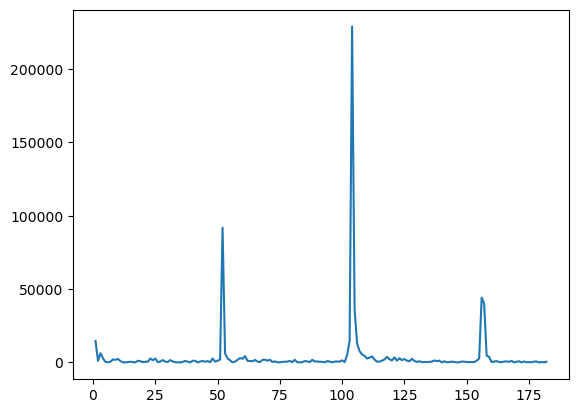

In [9]:
from scipy.signal import periodogram
import numpy as np
import matplotlib.pyplot as plt

x = np.array(store_sales.loc[('6', 'PRODUCE', '2016'), 'sales'])
display(len(x))
f, Pxx_den = periodogram(x, fs=365)
plt.plot(f[1:], Pxx_den[1:])

In [10]:
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
fourier = CalendarFourier(freq='W', order=4)
dp = DeterministicProcess(
    y.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)
X_trend_season = dp.in_sample()
X_trend_season['NewYear'] = (X_trend_season.index.dayofyear == 1)

X_trend_season_test = dp.out_of_sample(16)
X_trend_season_test['NewYear'] = (X_trend_season_test.index.dayofyear == 1)

In [11]:
display(X_trend_season)
display(X_trend_season_test)

,const,trend,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)",NewYear
date,,,,,,,,,
2017-01-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2017-01-02,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,False
2017-01-03,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,False
2017-01-04,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,False
2017-01-05,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...
2017-08-11,1.0,223.0,0.0,0.0,0.0,0.0,1.0,0.0,False
2017-08-12,1.0,224.0,0.0,0.0,0.0,0.0,0.0,1.0,False
2017-08-13,1.0,225.0,0.0,0.0,0.0,0.0,0.0,0.0,False


,const,trend,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)",NewYear
2017-08-16,1.0,228.0,0.0,0.0,1.0,0.0,0.0,0.0,False
2017-08-17,1.0,229.0,0.0,0.0,0.0,1.0,0.0,0.0,False
2017-08-18,1.0,230.0,0.0,0.0,0.0,0.0,1.0,0.0,False
2017-08-19,1.0,231.0,0.0,0.0,0.0,0.0,0.0,1.0,False
2017-08-20,1.0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2017-08-21,1.0,233.0,1.0,0.0,0.0,0.0,0.0,0.0,False
2017-08-22,1.0,234.0,0.0,1.0,0.0,0.0,0.0,0.0,False
2017-08-23,1.0,235.0,0.0,0.0,1.0,0.0,0.0,0.0,False
2017-08-24,1.0,236.0,0.0,0.0,0.0,1.0,0.0,0.0,False
2017-08-25,1.0,237.0,0.0,0.0,0.0,0.0,1.0,0.0,False


# 3. Model Training

In [12]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

store_numbers = store_sales.index.get_level_values('store_nbr').unique()
families = store_sales.index.get_level_values('family').unique()
y_pred = []
y_fit = []
for STORE_NBR in store_numbers:
    for FAMILY in families:
        idx = (slice(None), STORE_NBR, FAMILY)

        # Without lag
        X_i = pd.concat([X_promotion.loc[:, idx], X_trend_season], axis=1)
        X_i.columns = X_i.columns.astype(str)
        X_i = X_i.join(X_holidays, on='date').fillna(0.0)

        y_i = y.loc[:, idx[1:]]

        model = LinearRegression(fit_intercept=False)
        model.fit(X_i, y_i)
        y_fit_i = pd.Series(model.predict(X_i), index=X_promotion.index, name=y_i.name, dtype=y_i.dtype)
        y_fit.append(y_fit_i)
        # y_pred_i = []
        #
        # X_lag_pred = X_lag.loc[:, idx].iloc[[-1]]
        #
        # for i in range(16):
        #     t_i = X_trend_season_test.index[i]
        #
        #     X_lag_pred.index = [t_i]
        #     # X_lag_pred.iloc(axis=1)[1:] = X_lag_pred.iloc(axis=1)[:3]
        #     if i == 0:
        #         X_lag_pred.iloc(axis=1)[0] = y_i.iloc[-1]
        #     else:
        #         X_lag_pred.iloc(axis=1)[0] = pd.DataFrame([y_pred_i[i - 1]], dtype='float32').iloc[0]
        #
        #     X_pred_step_i = pd.concat([
        #         X_promotion_test.loc[[t_i], idx],
        #         X_trend_season_test.loc[[t_i]],
        #         X_lag_pred,
        #     ], axis=1)
        #     X_pred_step_i.columns = X_pred_step_i.columns.astype(str)
        #     X_pred_step_i.index.name = 'date'
        #     X_pred_step_i = X_pred_step_i.join(X_holidays_test, on='date').fillna(0.0)
        #
        #     y_pred_i.append(model.predict(X_pred_step_i).item())
        #
        # display(y_pred_i)

        X_pred_i = pd.concat([X_promotion_test.loc[:, idx], X_trend_season_test], axis=1)
        X_pred_i.columns = X_pred_i.columns.astype(str)
        X_pred_i.index.name = 'date'
        X_pred_i = X_pred_i.join(X_holidays_test, on='date').fillna(0.0)

        y_pred_i = pd.Series(model.predict(X_pred_i), index=X_promotion_test.index, name=y_i.name, dtype=y_i.dtype)
        y_pred.append(y_pred_i)

y_pred = pd.concat(y_pred, axis=1)
y_fit = pd.concat(y_fit, axis=1)

In [13]:
from sklearn.metrics import mean_squared_error
display(y_pred)
display(y)
display(y_fit)
display(mean_squared_error(y, y_fit))

1                                                          \
           AUTOMOTIVE BABY CARE    BEAUTY    BEVERAGES     BOOKS BREAD/BAKERY   
date                                                                            
2017-08-16   4.777072       0.0  6.582555  2352.638428  0.361551   404.326874   
2017-08-17   4.857466       0.0  4.082409  2006.561401  0.095378   340.896545   
2017-08-18   6.801347       0.0  4.190531  2301.810791  0.160079   369.344513   
2017-08-19   5.612895       0.0  4.691792  2320.976562 -0.088587   366.674500   
2017-08-20   2.806443       0.0  3.231844   924.833679 -0.088587   120.168533   
2017-08-21   4.872572       0.0  4.776767  2233.270264 -0.032617   370.330933   
2017-08-22   4.643706       0.0  2.730453  2180.963135  0.268761   335.809204   
2017-08-23   4.821819       0.0  4.638649  2405.393555  0.338699   402.565887   
2017-08-24   4.902213       0.0  2.138502  2075.993896  0.072525   334.799377   
2017-08-25   6.846093       0.0  2.246624  2462.970215  0.137226   362.163300   
2017-08-26   5.657641       0.0  4.696212  2490.474854 -0.111440   360.577332   
2017-08-27   2.851190       0.0  3.236265  1027.621582 -0.111440   117.323494   
2017-08-28   4.917318       0.0  4.781188  2369.413330 -0.055469   362.607727   
2017-08-29   4.688453       0.0  4.683201  2358.800293  0.245908   332.422150   
2017-08-30   4.866565       0.0  2.694742  2466.487305  0.315846   395.926697   
2017-08-31   4.946959       0.0  4.091250  2128.749023  0.049673   333.580414   

                                                            ...         9  \
           CELEBRATION    CLEANING       DAIRY        DELI  ... MAGAZINES   
date                                                        ...             
2017-08-16   16.734594  826.036682  843.517761  152.214798  ...  3.073483   
2017-08-17   20.320768  628.750183  653.145020  115.722778  ...  2.940516   
2017-08-18   23.321409  710.847229  769.869446  174.420837  ...  3.154781   
2017-08-19   14.313899  584.365234  739.541443  138.834518  ...  4.041940   
2017-08-20    3.957222  187.039917  287.043121   61.099220  ...  5.106456   
2017-08-21   14.841820  629.457031  714.793945  146.850296  ...  2.919287   
2017-08-22   16.124666  719.577271  681.847778  135.854431  ...  2.877410   
2017-08-23   16.755360  796.176270  807.522827  142.752579  ...  3.062393   
2017-08-24   20.341536  634.873230  648.696716  120.328560  ...  2.929426   
2017-08-25   23.342175  711.288696  757.191589  173.910980  ...  3.143692   
2017-08-26   14.334665  579.125122  724.120361  140.882492  ...  4.030851   
2017-08-27    3.977988  189.375259  268.878876   60.589363  ...  5.095367   
2017-08-28   14.862586  629.898499  699.372864  150.177170  ...  2.908198   
2017-08-29   16.145432  721.912659  670.541504  135.344574  ...  2.866321   
2017-08-30   16.776127  792.830017  794.844971  134.569260  ...  3.051304   
2017-08-31   20.362301  631.526978  641.505188  112.145248  ...  2.918337   

                                                                           \
                 MEATS PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS   
date                                                                        
2017-08-16  305.571228    380.131195     7.893943                7.046196   
2017-08-17  512.565979    348.761261     6.430518                7.492849   
2017-08-18  291.365967    311.497528     7.151976                6.207807   
2017-08-19  416.635834    607.926086    10.444983               12.923200   
2017-08-20  429.910522    645.748718    10.767563               14.327043   
2017-08-21  335.785706    423.343628     6.715393                7.250591   
2017-08-22  322.951019    428.792938     6.450160                7.670247   
2017-08-23  303.902283    371.531555     7.925235                6.866131   
2017-08-24  497.982269    351.030151     6.461810                7.312783   
2017-08-25  276.782288    309.108459     7.183268                6.027741   
2017-08-26  402

store_nbr           1                                                \
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2017-01-01        0.0       0.0    0.0       0.0   0.0     0.000000   
2017-01-02        5.0       0.0    0.0    1434.0   0.0   166.819000   
2017-01-03        4.0       0.0    4.0    3081.0   2.0   519.348022   
2017-01-04        1.0       0.0    4.0    3039.0   2.0   543.250977   
2017-01-05        2.0       0.0    3.0    2617.0   0.0   533.479980   
...               ...       ...    ...       ...   ...          ...   
2017-08-11        1.0       0.0    1.0    1006.0   0.0   145.606995   
2017-08-12        6.0       0.0    3.0    1659.0   0.0   243.220001   
2017-08-13        1.0       0.0    1.0     803.0   0.0   136.679001   
2017-08-14        1.0       0.0    6.0    2201.0   0.0   346.037994   
2017-08-15        4.0       0.0    4.0    1942.0   0.0   329.541016   

store_nbr                                            ...         9  \
family     CELEBRATION CLEANING   DAIRY        DELI  ... MAGAZINES   
date                                                 ...             
2017-01-01         0.0      0.0     0.0    0.000000  ...       0.0   
2017-01-02         0.0    332.0   376.0   44.980000  ...       5.0   
2017-01-03        15.0    952.0  1045.0  209.300003  ...       2.0   
2017-01-04        17.0   1055.0  1029.0  135.944000  ...       3.0   
2017-01-05        40.0    918.0   853.0  137.005997  ...       2.0   
...                ...      ...     ...         ...  ...       ...   
2017-08-11         4.0    341.0   343.0   64.302002  ...       5.0   
2017-08-12         3.0    351.0   526.0   99.487999  ...       2.0   
2017-08-13         1.0    169.0   266.0   47.770000  ...       3.0   
2017-08-14         4.0    571.0   699.0  154.578003  ...      12.0   
2017-08-15        21.0    703.0   602.0  116.402000  ...      11.0   

store_nbr                                                                  \
family           MEATS PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS   
date                                                                        
2017-01-01    0.000000           0.0          0.0                     0.0   
2017-01-02  659.570007        1243.0         11.0                    41.0   
2017-01-03  547.364014         876.0          6.0                    15.0   
2017-01-04  395.287994         677.0          6.0                    13.0   
2017-01-05  470.768005         604.0          7.0                    10.0   
...                ...           ...          ...                     ...   
2017-08-11  309.244995         373.0         11.0                     2.0   
2017-08-12  260.298004         400.0          7.0                    10.0   
2017-08-13  327.205994         510.0          2.0                     9.0   
2017-08-14  330.975006         445.0          2.0                    14.0   
2017-08-15  449.227997         522.0          6.0                     6.0   

store_nbr                                                                      \
family         POULTRY PREPARED FOODS      PRODUCE SCHOOL AND OFFICE SUPPLIES   
date                                                                            
2017-01-01    0.000000       0.000000     0.000000                        0.0   
2017-01-02  843.596008     115.188995  3136.895996                        1.0   
2017-01-03  714.659973     133.039001  3229.558105                        1.0   
2017-01-04  536.830017      75.201004  1491.416992                        7.0   
2017-01-05  414.100006     113.698997  1566.821045                        1.0   
...                ...            ...          ...                        ...   
2017-08-11  525.223999     112.099998  1453.078003                      140.0   
2017-08-12  383.386993     129.903992  1419.264038                      138.0   
2017-08-13  412.458008     105.168999  1693.607056    

1                                                      \
              AUTOMOTIVE BABY CARE        BEAUTY     BEVERAGES         BOOKS   
date                                                                           
2017-01-01 -4.218847e-15       0.0 -2.098322e-14  3.353762e-11 -2.886580e-15   
2017-01-02  5.000000e+00       0.0 -3.508305e-14  1.434000e+03 -1.332268e-15   
2017-01-03  3.167069e+00       0.0  4.532894e+00  2.641494e+03  1.022895e+00   
2017-01-04  3.345181e+00       0.0  4.492763e+00  2.815891e+03  1.092833e+00   
2017-01-05  3.425575e+00       0.0  5.889271e+00  2.311377e+03  8.266592e-01   
...                  ...       ...           ...           ...           ...   
2017-08-11  1.000000e+00       0.0  1.000000e+00  1.006000e+03 -4.746203e-15   
2017-08-12  5.568149e+00       0.0  4.687370e+00  2.293238e+03 -6.573486e-02   
2017-08-13  2.761697e+00       0.0  1.279096e+00  8.887563e+02 -6.573486e-02   
2017-08-14  4.827825e+00       0.0  4.772346e+00  2.197193e+03 -9.764194e-03   
2017-08-15  4.598960e+00       0.0  4.674359e+00  2.203258e+03  2.916133e-01   

                                                                    \
            BREAD/BAKERY   CELEBRATION      CLEANING         DAIRY   
date                                                                 
2017-01-01  9.379164e-13  6.217249e-15  1.790568e-12  2.196998e-11   
2017-01-02  1.668190e+02 -7.105427e-15  3.320000e+02  3.760000e+02   
2017-01-03  4.275273e+02  1.543938e+01  8.451548e+02  8.231562e+02   
2017-01-04  4.932000e+02  1.301307e+01  9.141783e+02  9.680335e+02   
2017-01-05  4.319377e+02  1.965625e+01  7.415121e+02  8.105790e+02   
...                  ...           ...           ...           ...   
2017-08-11  1.456070e+02  4.000000e+00  3.410000e+02  3.430000e+02   
2017-08-12  3.678935e+02  1.429313e+01  5.820299e+02  7.426182e+02   
2017-08-13  1.235556e+02  3.936455e+00  1.922800e+02  2.887483e+02   
2017-08-14  3.726339e+02  1.482105e+01  6.365911e+02  7.233571e+02   
2017-08-15  3.397383e+02  1.610390e+01  7.229236e+02  6.876677e+02   

                          ...             9                              \
                    DELI  ...     MAGAZINES         MEATS PERSONAL CARE   
date                      ...                                             
2017-01-01  2.486900e-13  ...  1.776357e-15 -9.720225e-12 -1.574563e-11   
2017-01-02  4.498000e+01  ...  5.000000e+00  6.595700e+02  1.243000e+03   
2017-01-03  1.501219e+02  ...  3.243354e+00  3.780254e+02  5.045264e+02   
2017-01-04  1.519044e+02  ...  3.428338e+00  3.589767e+02  4.503703e+02   
2017-01-05  1.243648e+02  ...  3.295371e+00  5.659714e+02  4.221057e+02   
...                  ...  ...           ...           ...           ...   
2017-08-11  6.430200e+01  ...  5.000000e+00  3.092450e+02  3.730000e+02   
2017-08-12  1.355077e+02  ...  4.053029e+00  4.053900e+02  6.041046e+02   
2017-08-13  5.905126e+01  ...  5.117545e+00  4.315795e+02  6.434798e+02   
2017-08-14  1.473602e+02  ...  2.930376e+00  3.374546e+02  4.210747e+02   
2017-08-15  1.338065e+02  ...  2.888499e+00  3.246199e+02  4.280767e+02   

                                                                               \
            PET SUPPLIES PLAYERS AND ELECTRONICS       POULTRY PREPARED FOODS   
date                                                                            
2017-01-01  1.332268e-14           -3.659295e-13  4.376943e-12   4.817480e-12   
2017-01-02  1.100000e+01            4.100000e+01  8.435960e+02   1.151890e+02   
2017-01-03  5.417524e+00            1.361242e+01  4.041123e+02   1.231100e+02   
2017-01-04  6.892599e+00            1.280831e+01  3.732173e+02   1.151462e+02   
2017-01-05  5.429174e+00            1.325496e+01  3.547321e+02   1.140224e+02   
...                  ...                     ...           ...            ...   
2017-08-11  1.100000e+01            2.000000e+00  5.252240e+02   1.121000e+02   
2017-08-12  1.041369e+01            1.310326e+01  5.428928e+

57806.797

53332.34

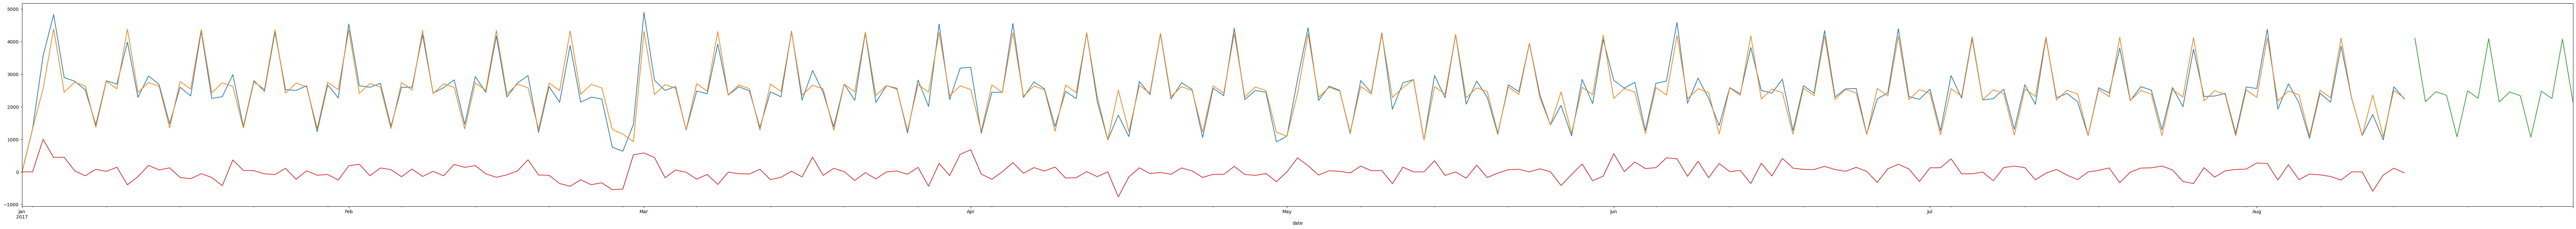

In [14]:
# print(store_sales.index.get_level_values('family').unique())

idx = ('1', 'PRODUCE')
ax = y.loc[:, idx].plot(figsize=(100, 8))
ax = y_fit.loc[:, idx].plot(ax=ax)
ax = y_pred.loc[:, idx].plot(ax=ax)
ax_2 = (y.loc[:, idx] - y_fit.loc[:, idx]).plot(figsize=(100, 8))
display(mean_squared_error(y.loc[:, idx], y_fit.loc[:, idx]))

In [15]:
y_pred_submit = y_pred.copy()
y_pred_submit = y_pred_submit.clip(lower=0)
y_pred_submit.columns.names = ['store_nbr', 'family']
y_pred_submit = y_pred_submit.stack(['store_nbr', 'family'], future_stack=True)
y_pred_submit = y_pred_submit.to_frame()
y_pred_submit.columns = pd.Index(['sales'])

In [16]:
csv_submit = y_pred_submit.reset_index().loc[:, ['sales']]
csv_submit.index = csv_submit.index + 3000888
csv_submit.index.names = ['id']
csv_submit.to_csv('results/submission.csv')
display(csv_submit)

,sales
id,
3000888,4.777072
3000889,0.000000
3000890,6.582555
3000891,2352.638428
3000892,0.361551
...,...
3029395,336.521179
3029396,92.406418
3029397,1089.775513
